In [4]:
%pip install tqdm

/bin/bash: /home/therandomtroll/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os
from tqdm import tqdm

In [6]:
# https://stackoverflow.com/questions/56905592/automatic-contrast-and-brightness-adjustment-of-a-color-photo-of-a-sheet-of-pape
def convertScale(img, alpha, beta):

    new_img = img * alpha + beta
    new_img[new_img < 0] = 0
    new_img[new_img > 255] = 255
    return new_img.astype(np.uint8)


# Automatic brightness and contrast optimization with optional histogram clipping
def automatic_brightness_and_contrast(image, clip_hist_percent=25):
    plt.imshow(image)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)

    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))

    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 2.0

    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1

    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
        maximum_gray -= 1

    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha

    # Calculate new histogram with desired range and show histogram 
    new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
    plt.plot(hist)
    plt.plot(new_hist, color='green')
    plt.xlim([0,256])
    plt.show()

    auto_result = convertScale(image, alpha=alpha, beta=beta)
    plt.imshow(auto_result)
    plt.show()
    return (auto_result, alpha, beta)

  0%|                                                                                         | 0/56808 [00:00<?, ?it/s]

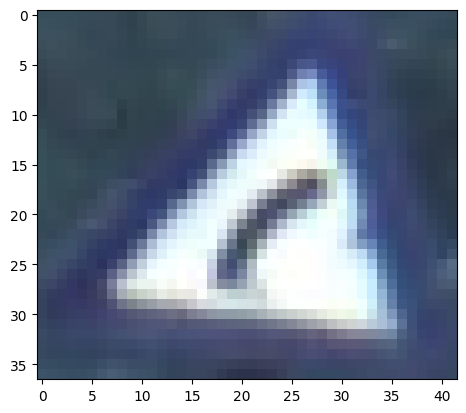

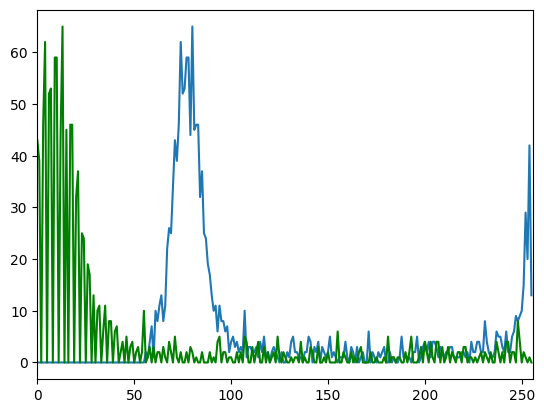

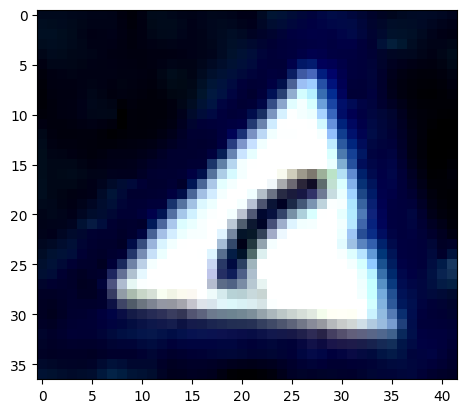

  0%|                                                                               | 1/56808 [00:00<3:53:01,  4.06it/s]

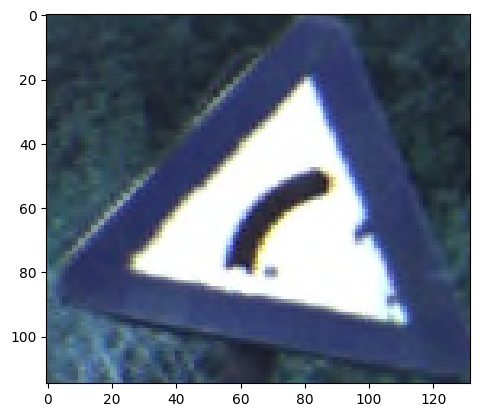

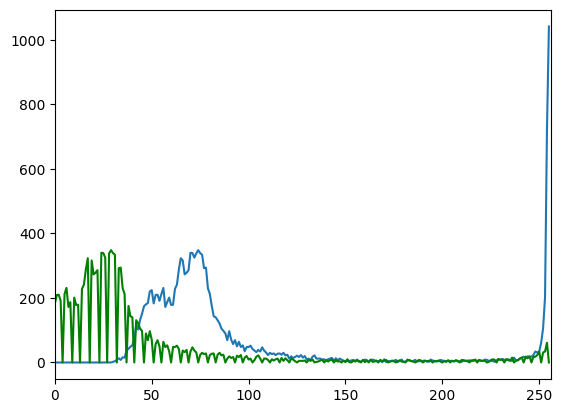

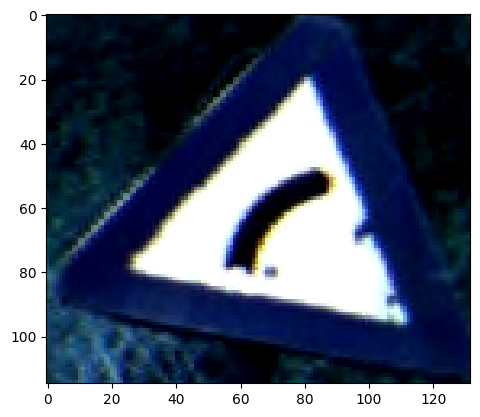

  0%|                                                                               | 2/56808 [00:00<3:24:10,  4.64it/s]

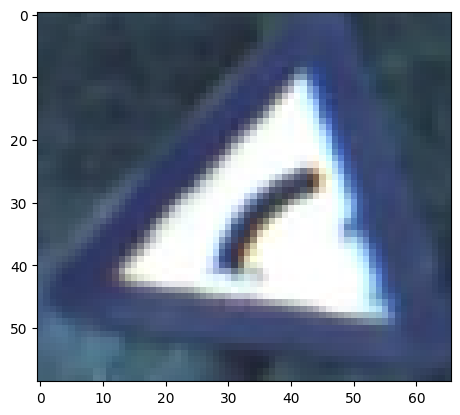

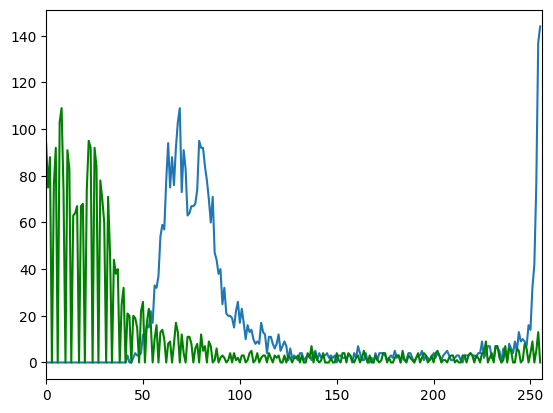

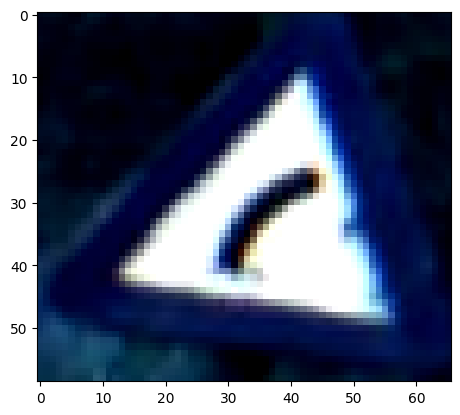

  0%|                                                                               | 3/56808 [00:00<3:13:16,  4.90it/s]

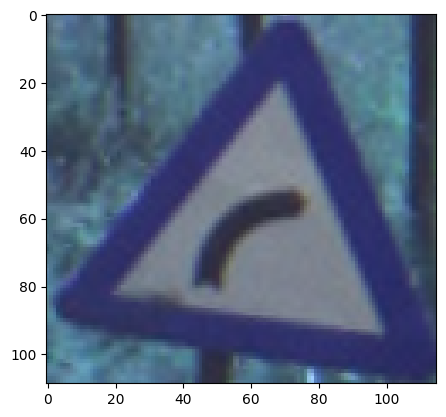

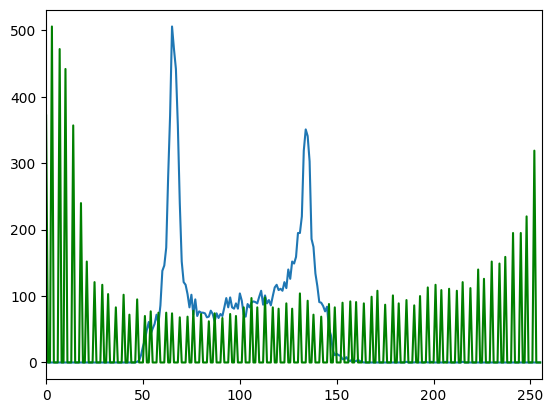

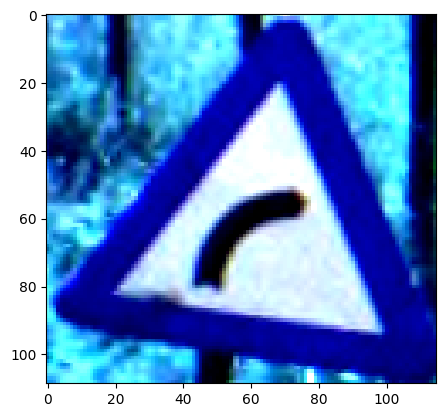

  0%|                                                                               | 3/56808 [00:00<4:16:53,  3.69it/s]


KeyboardInterrupt: 

In [7]:
directory = '../input/train'
try:
    os.mkdir(f'{directory}/normalized')
except:
    pass

train_images = []
train_files = glob.glob(directory + '/*/*.ppm')  # iterate through all subfolders
train_labels = []
track_labels = []

with tqdm(total=len(train_files)) as pbar:
    for file in train_files:
        if '.ppm' in file:
            image = cv2.imread(file)
            auto_result, alpha, beta = automatic_brightness_and_contrast(image)
            image_id = file[19:-4]
            track_id = file[15:18]
            if not os.path.exists(f'{directory}/normalized/{track_id}'):
                try:
                    os.mkdir(f'{directory}/normalized/{track_id}')
                except:
                    pass
            if not cv2.imwrite(f'{directory}/normalized/{track_id}/{image_id}_norm.ppm', auto_result):
                print("Error saving")
            pbar.update(1)

In [5]:
directory = '../input/test'
try:
    os.mkdir(f'{directory}/normalized')
except:
    pass

test_images = []
test_files = glob.glob(directory + '/*/*')  # iterate through all subfolders
test_labels = []

with tqdm(total=len(test_files)) as pbar:
    for file in test_files:
        if '.ppm' in file:
            image = cv2.imread(file)
            auto_result, alpha, beta = automatic_brightness_and_contrast(image)
            image_id = file[18:-4]
            track_id = file[14:17]
            if not os.path.exists(f'{directory}/normalized/{track_id}'):
                try:
                    os.mkdir(f'{directory}/normalized/{track_id}')
                except:
                    pass
            cv2.imwrite(f'{directory}/normalized/{track_id}/{image_id}_norm.ppm', auto_result)
            pbar.update(1)

 99%|████████████████████████████████████████████████████████████████████████████▌| 20442/20551 [14:37<00:04, 23.29it/s]
